# Part I - Prosper Loan Data Analysis
## by Sharlet Teresa Shaji

## Introduction

I have selected the Prosper Loan dataset for analysis. Founded in 2005, Prosper was the first peer-to-peer lending marketplace in the United States. Since its inception, Prosper has facilitated over $18 billion in loans to more than 1,060,000 people. The dataset we're examining consists of 113,937 loans with 81 variables per loan, covering details like loan amount, borrower rate (or interest rate), current loan status, borrower income, and more. For a detailed understanding of these variables, refer to this [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). Before starting, I refined the dataset by removing some columns that are not relevant to this exploration.


Here, we try to answer questions like:
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?
* What factors affect a loan to be charged off or considered as defaulted?

**Primary Variables:**
Loan Status
Borrower APR
Prosper Score

**Secondary Variables:**
Credit Rating
Debt to Income Ratio
Listing Category
Employment Status
Number of Deliquencies
Number of public records
Credit Range
Income Range
Homeowner Status

## Preliminary Wrangling
We will first import the data set and wrangle to clean and correct issues with the data set. Let's start by importing the packages we need;

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sqlalchemy import create_engine

%matplotlib inline

In [16]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [18]:
#checking for columns with null values
loans.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [19]:
# Exploring the datatypes of each column
loans.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [20]:
#This shows the number of unique values in each column
loans.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [21]:
# descriptive statistics for numeric variables
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?
There are 113937 loans in the dataset with 81 features; We have dropped some colums to make the dataset easier to work with. We will be working with 113937 loans in the dataset with 43 features as listed below;

(CreditGrade, ProsperRating (Alpha), Term,	LoanStatus, ClosedDate, BorrowerAPR,  EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperScore, BorrowerState,	Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, CreditScoreRangeLower, CreditScoreRangeUpper, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, InquiriesLast6Months, TotalInquiries,  CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years,	PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber). 

Based on the Prosper Loan Data - Variable Definitions file, we have a substantial amount of data before and after 2009. We might need to look at an analysis before and after 2009.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what factors affect a loan’s outcome status, what affects the borrower’s APR or interest rate, if there are differences between loans depending on employment status.

* Qualitative Variables:

LoanStatus - Whether a loan is Cancelled, Chargedoff (The worst one), Completed, Current, Defaulted, FinalPaymentInProgress, or PastDue. <br>
Listing Category - This details the type of loan which was taken


* Quantitative Variables:

BorrowerAPR - Effective rate that the borrower pays per year, plus servicing fees. There is a BorrowerRate variable, but this doesn't account for the servicing fee. <br>
ProsperScore - Custom score, based on historical data, from 1-10. 10 is the best, or lowest risk. (Post-2009 only) <br>
CreditGrade (Pre-2009 only) 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following variables might have some impact on the type of loan that gets issued (i.e. things that affect Features of Interest), hence consequently affect the loan's outcome status:

#### Qualitative Variables:

* Term - Months of loan; Although this sounds quantitative, there are only 12 month, 36 month, and 60 month loans.

* CreditGrade (Pre-2009 only) 

* ProsperRating (Alpha) - Prosper Rating assigned to loan at the beginning. There is a numeric version, but since we're dealing with a categorical datatype, we will opt to just look at the Alpha version. (Post 2009 only)

* CreditRating - Combined variable between CreditGrade and ProsperRating (Alpha). We will check to see if our analysis shows anything different with this variable.

* ListingCategory (numeric) - Type of listing that the loan falls under, which includes: 
  0 - Not available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

* BorrowerState - 2 letter abbreviation of where the loan was created for (Might be interesting to pair with the statuses)

* EmploymentStatus - of Borrower

* CreditRange - Since the delta value between the Upper value and the Lower value is 19 for all of the rows, we can safely just create a range between these bounds.


#### Quantitative Variables:
Others include;

* DebtToIncomeRatio - Based on when credit profile was pulled, and capped at 10.01 (1001 %)

* TotalProsperPaymentsBilled - Number of on time payments

* InvestmentFromFriendsCount - Number of friends that invested in a loan

* Investors - Number of Lenders

We are removing ClosedDate - We won't need to worry too much about the date that a loan stopped. This variable only applies to loans that are Cancelled, Completed, Chargedoff, and Defaulted

## Univariate Exploration

> In this section, investigate distributions of individual variables. We take a deeper look at the unusual points or outliers to better understand the relationship between the variables. Here we try to use the "Question-Visualization-Observation" framework throughout the exploration. We ask a question, create the visualization and try to find suitable answer for the same. And we use scatter count plot or histograms to analyse the same.

In [22]:
counts=loans['LoanStatus'].value_counts()
counts

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Now, as we are more interested to analyse the loan which are charged off and cancelled, as our these are the loans which require more attention. We try to analyse these loans in detail. We first would like to take a look at the number of loans which are determined as chrged off and defaulted.

Text(0, 0.5, 'Frequency')

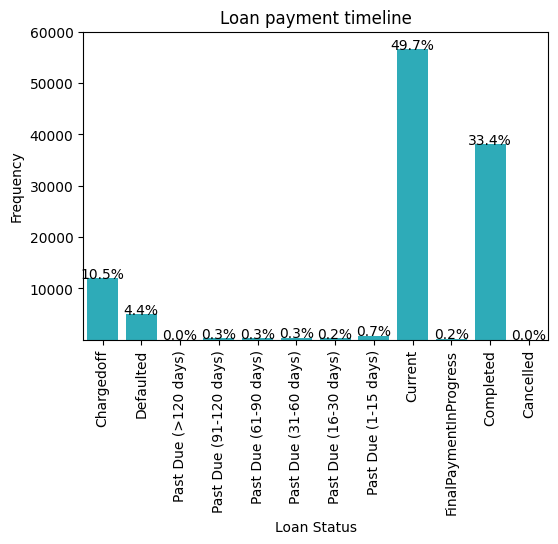

In [23]:
import seaborn as sb
# Let's reorder this categorical data from worst to best, based on level of lender distaste. 
# A cancelled loan doesn't necessarily impact the lender negatively, 
# other than for the fact that the lender has to find another borrower. 
# So we place Cancelled last, to represent a 'neutral' status.
plt.figure(figsize=(6, 4))

ls_order = ['Chargedoff', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)',
            'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)', 
            'Past Due (1-15 days)', 'Current', 'FinalPaymentInProgress', 'Completed', 'Cancelled']

# We can now view this on the bar chart

default_color = sb.color_palette()[9]

ax = sb.countplot(data = loans, x = 'LoanStatus', color = default_color, order = ls_order)
plt.xticks(rotation = 90)

for i in range(len(ls_order)):
    count = counts[ls_order[i]]
    #print(ls_order[i], ': ', count)
    display_val = '{:.1f}%'.format(100 * count / sum(counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

plt.title('Loan payment timeline')
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000])
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

# fig.savefig('output1.png', bbox_inches='tight');

We see that more than 50% of the loans are completed which is encouraging, however its concerning that more than 16% of the total loan amount are considered as charged off or as defaulted. 

In [24]:
loans.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

As mentioned before our primary analysis is concerned with loans which are marked as charged off and defaulted. Hence, we try to understand the employment status of the listings of these loans first. For the samepurpose we first filter our dataframe with loans labelled as charged off and defaulted and conduct the further analysis. 

*Further suggestion: Consider to find a plot where you could show the total distribution and then the seperate distribution of the Charged off and Defaulted. I tried different methods for the implementation of the same. I would suggest instead of concatenation or creating subplots its better to write the percentage of the data compared to the total data.*

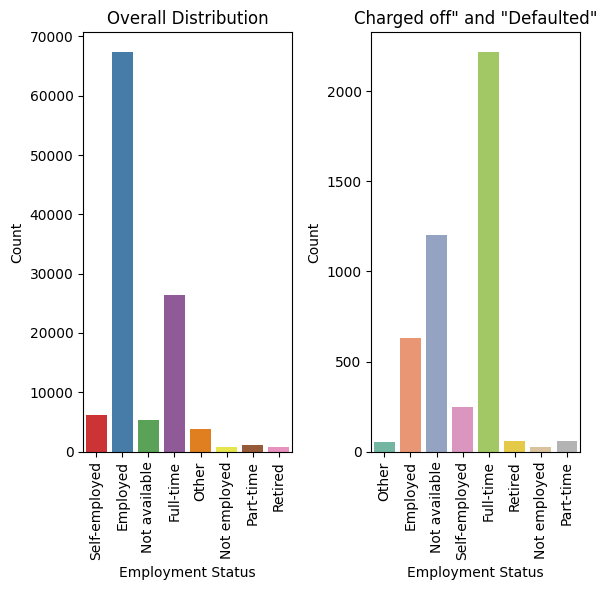

In [25]:
# Filter the DataFrame for 'Charged off' and 'Defaulted' loan statuses
filtered_loans = loans[(loans['LoanStatus'] == 'Charged off') | (loans['LoanStatus'] == 'Defaulted')]

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(1, 2, figsize=(6, 6))  # 1 row, 2 columns

# Plot for the full dataframe
sns.countplot(data=loans, x='EmploymentStatus', palette='Set1', ax=ax[0])
ax[0].set_title('Overall Distribution')
ax[0].set_xlabel('Employment Status')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Plot for the filtered dataframe
sns.countplot(data=filtered_loans, x='EmploymentStatus', palette='Set2', ax=ax[1])
ax[1].set_title('Charged off" and "Defaulted"')
ax[1].set_xlabel('Employment Status')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


<module 'matplotlib.pyplot' from '/opt/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

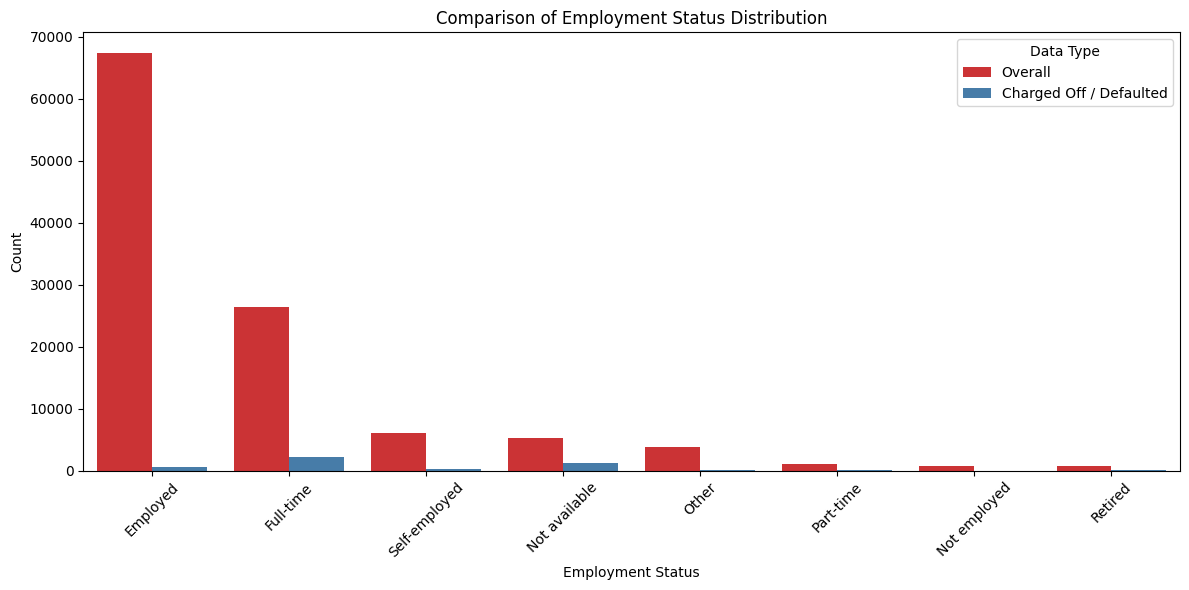

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'loans' is your DataFrame already loaded with data
# Filter the DataFrame for 'Charged off' and 'Defaulted' loan statuses
filtered_loans = loans[(loans['LoanStatus'] == 'Charged off') | (loans['LoanStatus'] == 'Defaulted')]

# Compute counts for the full dataframe
full_counts = loans['EmploymentStatus'].value_counts().reset_index()
full_counts.columns = ['EmploymentStatus', 'Count']
full_counts['Type'] = 'Overall'

# Compute counts for the filtered dataframe
filtered_counts = filtered_loans['EmploymentStatus'].value_counts().reset_index()
filtered_counts.columns = ['EmploymentStatus', 'Count']
filtered_counts['Type'] = 'Charged Off / Defaulted'

# Concatenate both dataframes for plotting
plot_data = pd.concat([full_counts, filtered_counts])

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='EmploymentStatus', y='Count', hue='Type', palette='Set1')
plt.title('Comparison of Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Data Type')
plt.tight_layout()
plt

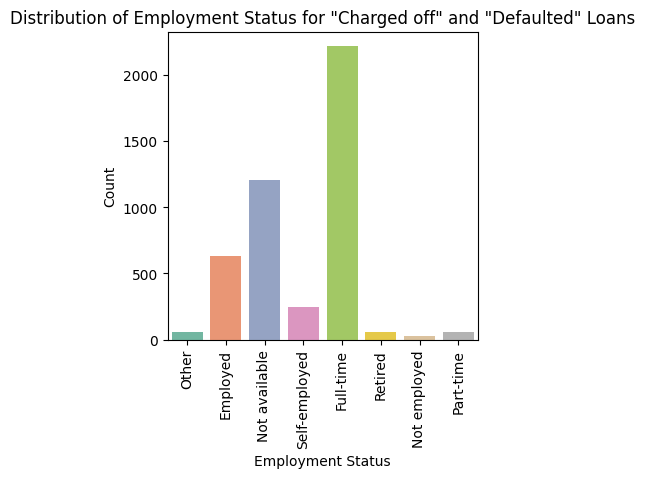

In [27]:
# Filter the DataFrame for 'Charged off' and 'Defaulted' loan statuses
filtered_loans = loans[(loans['LoanStatus'] == 'Charged off') | (loans['LoanStatus'] == 'Defaulted')]

# Plotting the distribution of Employment Status for these filtered loan statuses
plt.figure(figsize=(4,4))
ax1 = sns.countplot(data=filtered_loans, x='EmploymentStatus', palette='Set2')
plt.title('Distribution of Employment Status for "Charged off" and "Defaulted" Loans')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


*Suggestion: Maybe the change the bargraph with a color palette if it all seems important woth maximum the deeper color and the other with the lighter shade*

The below plot represents the percentage of charged and default loans relative to the total distribution of the loans. 

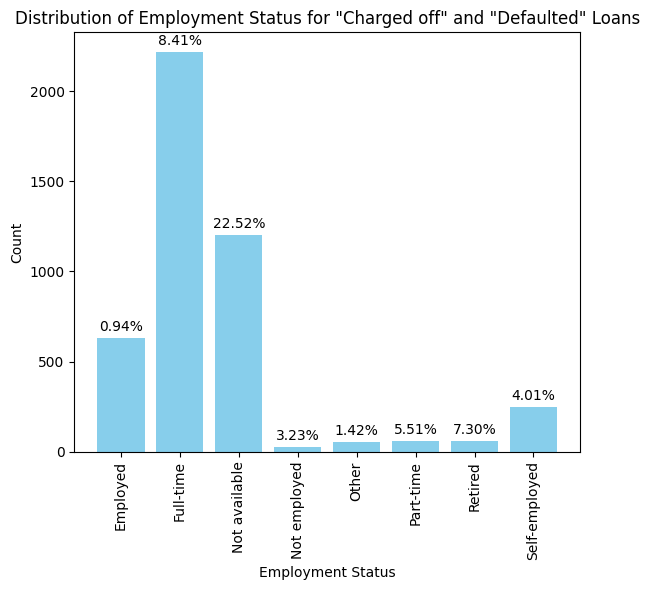

In [28]:
# Filter the DataFrame for 'Charged off' and 'Defaulted' loan statuses
filtered_loans = loans[(loans['LoanStatus'] == 'Charged off') | (loans['LoanStatus'] == 'Defaulted')]

# Calculate total counts for each EmploymentStatus in the entire DataFrame
total_counts = loans['EmploymentStatus'].value_counts()

# Calculate counts for the filtered DataFrame for 'Charged off' and 'Defaulted'
filtered_counts = filtered_loans['EmploymentStatus'].value_counts()

# Creating a DataFrame from counts
employment_data = pd.DataFrame({
    'TotalCount': total_counts,
    'FilteredCount': filtered_counts
}).fillna(0)  # Fill missing values with 0

# Calculate the percentage
employment_data['Percentage'] = (employment_data['FilteredCount'] / employment_data['TotalCount'] * 100).round(2)

# Plotting
plt.figure(figsize=(6,6))
bars = plt.bar(employment_data.index, employment_data['FilteredCount'], color='skyblue')

# Use bar_label to add labels to the bars
plt.bar_label(bars, labels=[f'{p:.2f}%' for p in employment_data['Percentage']], padding=3)

plt.title('Distribution of Employment Status for "Charged off" and "Defaulted" Loans')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


We see that 22.52% of the NA Employment status has charged off or defaulted loan status. Among the retired employees and Full time employees contributes more the charged distribution checking the statistics of the distribution.

Now we try to analyse the credit scores of the listings with loan status as charged off or defaulted.

In [29]:
loans.BorrowerRate

0         0.1580
1         0.0920
2         0.2750
3         0.0974
4         0.2085
           ...  
113932    0.1864
113933    0.1110
113934    0.2150
113935    0.2605
113936    0.1039
Name: BorrowerRate, Length: 113937, dtype: float64

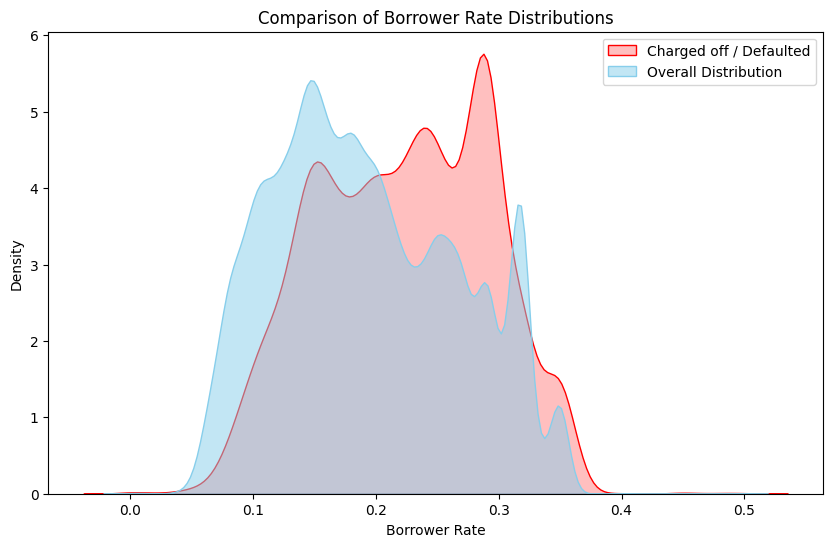

In [30]:
# Filter the DataFrame for 'Charged off' and 'Defaulted' loan statuses
filtered_loans = loans[(loans['LoanStatus'] == 'Charged off') | (loans['LoanStatus'] == 'Defaulted')]

# Plotting the KDE of BorrowerRate for these filtered loan statuses
plt.figure(figsize=(10, 6))

# KDE plot for the filtered data
sns.kdeplot(data=filtered_loans, x='BorrowerRate', fill=True, label='Charged off / Defaulted', color='red')

# KDE plot for the entire dataset
sns.kdeplot(data=loans, x='BorrowerRate', fill=True, label='Overall Distribution', color='skyblue', alpha=0.5)

plt.title('Comparison of Borrower Rate Distributions')
plt.xlabel('Borrower Rate')
plt.ylabel('Density')
plt.legend()  # Add a legend to distinguish the plots
plt.show()


### Lower Borrower Rate Reduce Loan Defaults

From the kde plot we see that the Borrower rate is higher for charged offs and defaulted loans when compared to the overall loan status. Hence, introducing a margin for the borrower rates could lead to lower number of loans labelled as "Charged Offs" and "Defaulted".

In [31]:
loans = loans.rename(columns={'ProsperRating (numeric)': 'ProsperRating'})

In [32]:
loans[loans['ProsperRating']==7].ProsperRating.count()

5372

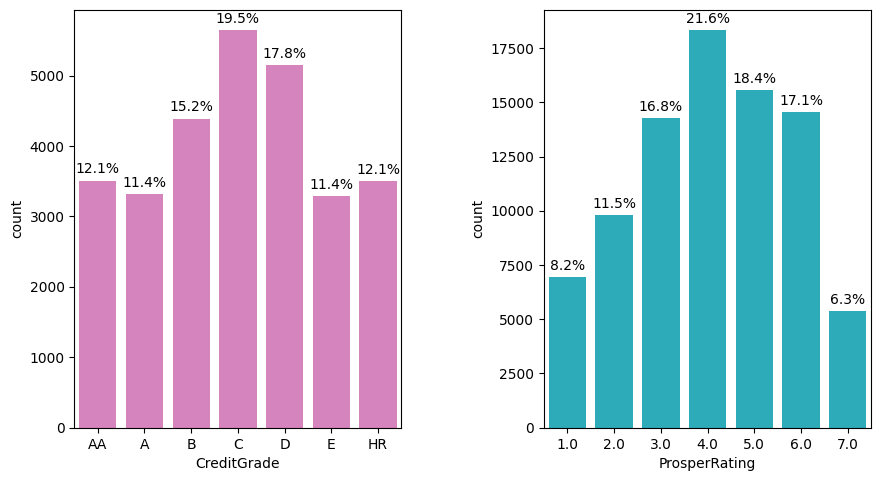

In [33]:
# Define the order of categories if needed
cg_order = ['AA','A','B','C','D','E','HR']
pr_order = [1,2,3,4,5,6,7]
# Calculate the count of each credit grade, normalized to get percentages
credit_count = loans['CreditGrade'].value_counts(normalize=True).reindex(cg_order, fill_value=0) * 100
Prosper_count = loans['ProsperRating'].value_counts(normalize=True).reindex(pr_order, fill_value=0) * 100

color1 = sb.color_palette()[9]
color2 = sb.color_palette()[6]


fig, ax = plt.subplots(ncols=2, figsize = [10,6])
sns.countplot(data=credit_count, x=loans['CreditGrade'], color=color2, order=cg_order, ax = ax[0])
sns.countplot(data=Prosper_count, x=loans['ProsperRating'], color=color1, ax=ax[1])

# Add percentage labels on each bar using bar_label
ax[0].bar_label(ax[0].containers[0], labels=[f'{v:.1f}%' for v in credit_count], padding=3)
ax[1].bar_label(ax[1].containers[0], labels=[f'{v:.1f}%' for v in Prosper_count], padding=3)

fig.tight_layout(pad=5.0)
plt.show()

### Comparison with Credit Grade & Prosper Rating

We see that though both the Credit Score and the Prosper Rating has a central tendency of around 20%. Credit Grade is slightly skewed towards the highest credit categories(C & D). The prosper rating gives a bell shape with most of the values distributed across the center.

In [34]:
# Rename 'ListingCategory (numeric)' to 'ListingCategory'
loans = loans.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

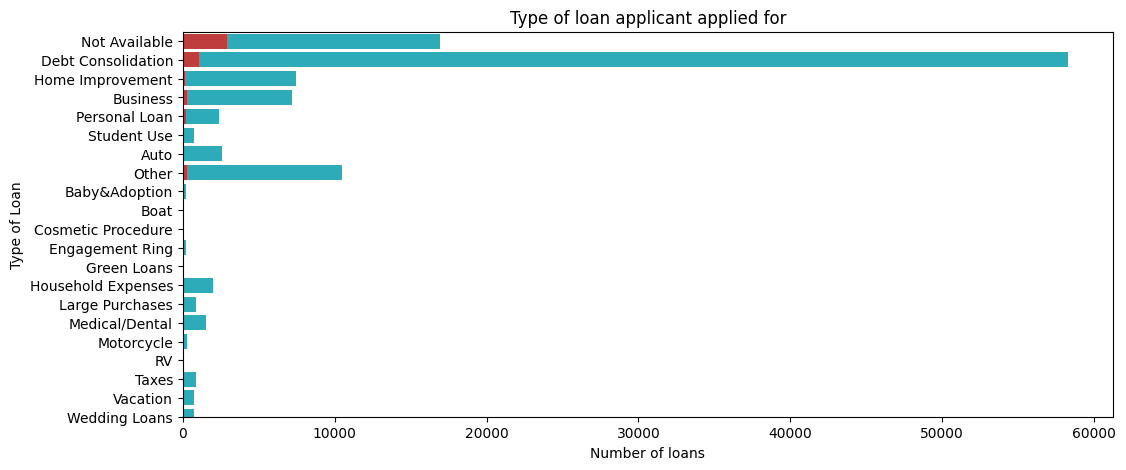

In [35]:
binsize = 1
bins = np.arange(0,21,binsize)
name = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
        'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 
        'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
ticks = np.arange(0,21,1)
color1 = sb.color_palette()[9]
filtered_loans = loans[(loans['LoanStatus'] == 'Charged off') | (loans['LoanStatus'] == 'Defaulted')]
color2 = sb.color_palette()[3]

plt.figure(figsize=[12, 5])
sb.countplot(data=loans, y='ListingCategory', color = color1)
sb.countplot(data=filtered_loans, y='ListingCategory', color = color2)
plt.yticks(ticks,name)
plt.xlabel('Number of loans')
plt.ylabel('Type of Loan')
plt.title("Type of loan applicant applied for")


fig.savefig('output10.png', bbox_inches='tight')

We see that this not a good way of plotting the bar graph as here we cant see the relative distribution of the charged off and defaulted loans comparison to the overall distribution of the loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> I changed a few attribute names for better exploration and  We see that 22.52% of the NA Employment status has charged off or defaulted loan status. Among the retired employees and Full time employees contributes more the charged distribution checking the statistics of the distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I transformed the data for the CreditGrade and ProsperRating to percentage counts for better comparison between the data distribution of the same, because the count was higher for ProsperRating as it was later introduced compared to CreditGrade.

## Bivariate Exploration

In this section, we investigate relationships between pairs of variables in the prosper loan data. We will be investigating variables we already looked at previously in relation to one another. To start off with, I want to look at the pairwise correlations present between features in the data.

We included at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

In [36]:
loans = loans.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

In [37]:
#Changing Credit score value from the alphabetical to numerical for further analysis
credit_grade= {
    'HR': 1,
    'E': 2,
    'D': 3,
    'C': 4,
    'B': 5,
    'A': 6,
    'AA': 7,
    'NC': None  # Assuming 'NC' should be treated as NaN
}

# Apply the mapping to the 'CreditGrade' column
loans['CreditGrade'] = loans['CreditGrade'].map(credit_grade)
loans.CreditGrade.unique()

array([ 4., nan,  1.,  7.,  3.,  5.,  2.,  6.])

### Expected Correlations

We try to the correlation between a few variables, our expectations looks like these:

CreditGrade: Negatively correlated with AmountDelinquent, PublicRecordsLast10Years, and BorrowerAPR.
AmountDelinquent: Positively correlated with PublicRecordsLast10Years and BorrowerAPR.
PublicRecordsLast10Years: Positively correlated with BorrowerAPR

In [38]:
numeric_vars = ['CreditGrade', 'AmountDelinquent', 'PublicRecordsLast10Years', 'BorrowerAPR']
categoric_vars = ['EmploymentStatus', 'ListingCategory', 'LoanStatus', 'ProsperRating (Alpha)']

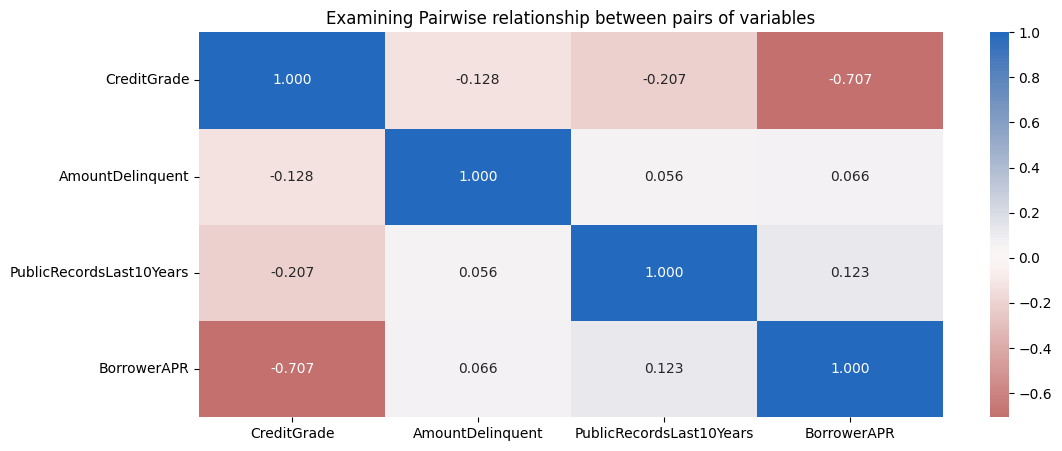

In [39]:
plt.figure(figsize = [12, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Examining Pairwise relationship between pairs of variables');
plt.show()
fig.savefig('output11.png', bbox_inches='tight');

#### Matches Expectation:

CreditGrade and AmountDelinquent (weak negative correlation) <br>
CreditGrade and PublicRecordsLast10Years (moderate negative correlation) <br>
CreditGrade and BorrowerAPR (strong negative correlation) <br>
PublicRecordsLast10Years and BorrowerAPR (weak positive correlation) <br>

#### Lost a Mark:

AmountDelinquent and PublicRecordsLast10Years (very weak positive correlation) <br>
AmountDelinquent and BorrowerAPR (very weak positive correlation) <br>

#### Suggestion:
Next time we could try to represent the plot as a gradient by prudent selection of color pallette.

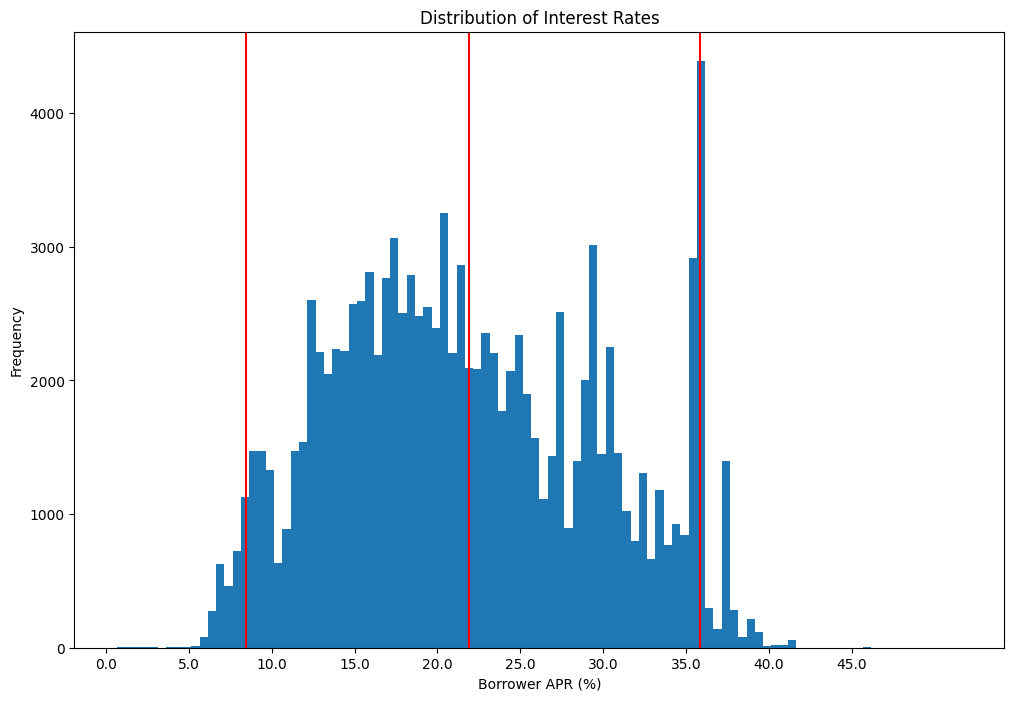

In [40]:
null_apr = loans[loans['BorrowerAPR'].isnull()].index

loans.drop(null_apr, axis = 0, inplace = True)

bapr_bins = np.arange(loans['BorrowerAPR'].min(), loans['BorrowerAPR'].max() + 0.005, 0.005)

mean_APR = loans['BorrowerAPR'].mean()

low_APR = np.percentile(loans['BorrowerAPR'], 2.5)
high_APR = np.percentile(loans['BorrowerAPR'], 97.5)

fig = plt.figure(figsize = [12,8])
ax_2 = plt.hist(data = loans, x = 'BorrowerAPR', bins = bapr_bins)

plt.axvline(x = mean_APR, color = 'r', linewidth = 1.5)
plt.axvline(x = low_APR, color = 'r', linewidth = 1.5)
plt.axvline(x = high_APR, color = 'r', linewidth = 1.5)

x_range = np.arange(0, 0.45 + 0.05, 0.05)
x_label = ['{:.1f}'.format(v * 100) for v in x_range]

plt.xticks(x_range, x_label);
plt.xlabel('Borrower APR (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates');


fig.savefig('output7.png', bbox_inches='tight');

In [41]:
# Create Borrower APR y-axis labels

borrowerAPR_ticks = np.arange(0, 0.55, 0.05)
borrowerAPR_labels = ['{:.1f}'.format(v * 100) for v in borrowerAPR_ticks]

print(borrowerAPR_ticks)
print(borrowerAPR_labels)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
['0.0', '5.0', '10.0', '15.0', '20.0', '25.0', '30.0', '35.0', '40.0', '45.0', '50.0']


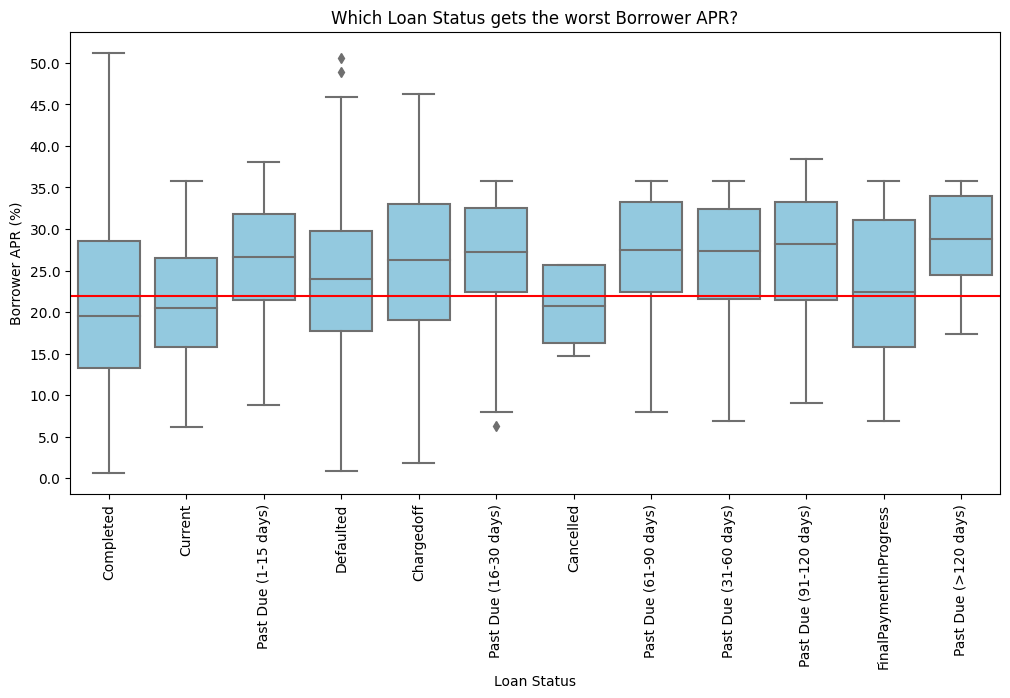

In [42]:
fig = plt.figure(figsize = [12,6])

ax_10 = sb.boxplot(data = loans, x = 'LoanStatus', y = 'BorrowerAPR',
           color = 'skyblue')

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)

plt.xlabel('Loan Status')
plt.ylabel('Borrower APR (%)')

plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)
plt.title('Which Loan Status gets the worst Borrower APR?');

fig.savefig('output13.png', bbox_inches='tight');

As expected, there is a negative correlation between Credit Score and Borrower APR since the lower the credit score, the higher the borrower APR in case of delinquencies. However, there is no significant correlation between TotalProsperLoans vs Amount deliquent.

## Multivariate Exploration

We see best type of loans given to full-time employed customers but it is also quite likely to be chargedoff. The below multivariate shows several indicators:

It seems that there is no correlation between Cancelled loans, PastDue and Borrower APR.

We additionally need to check if all our variables are ordinal or not.

<Figure size 1000x1000 with 0 Axes>

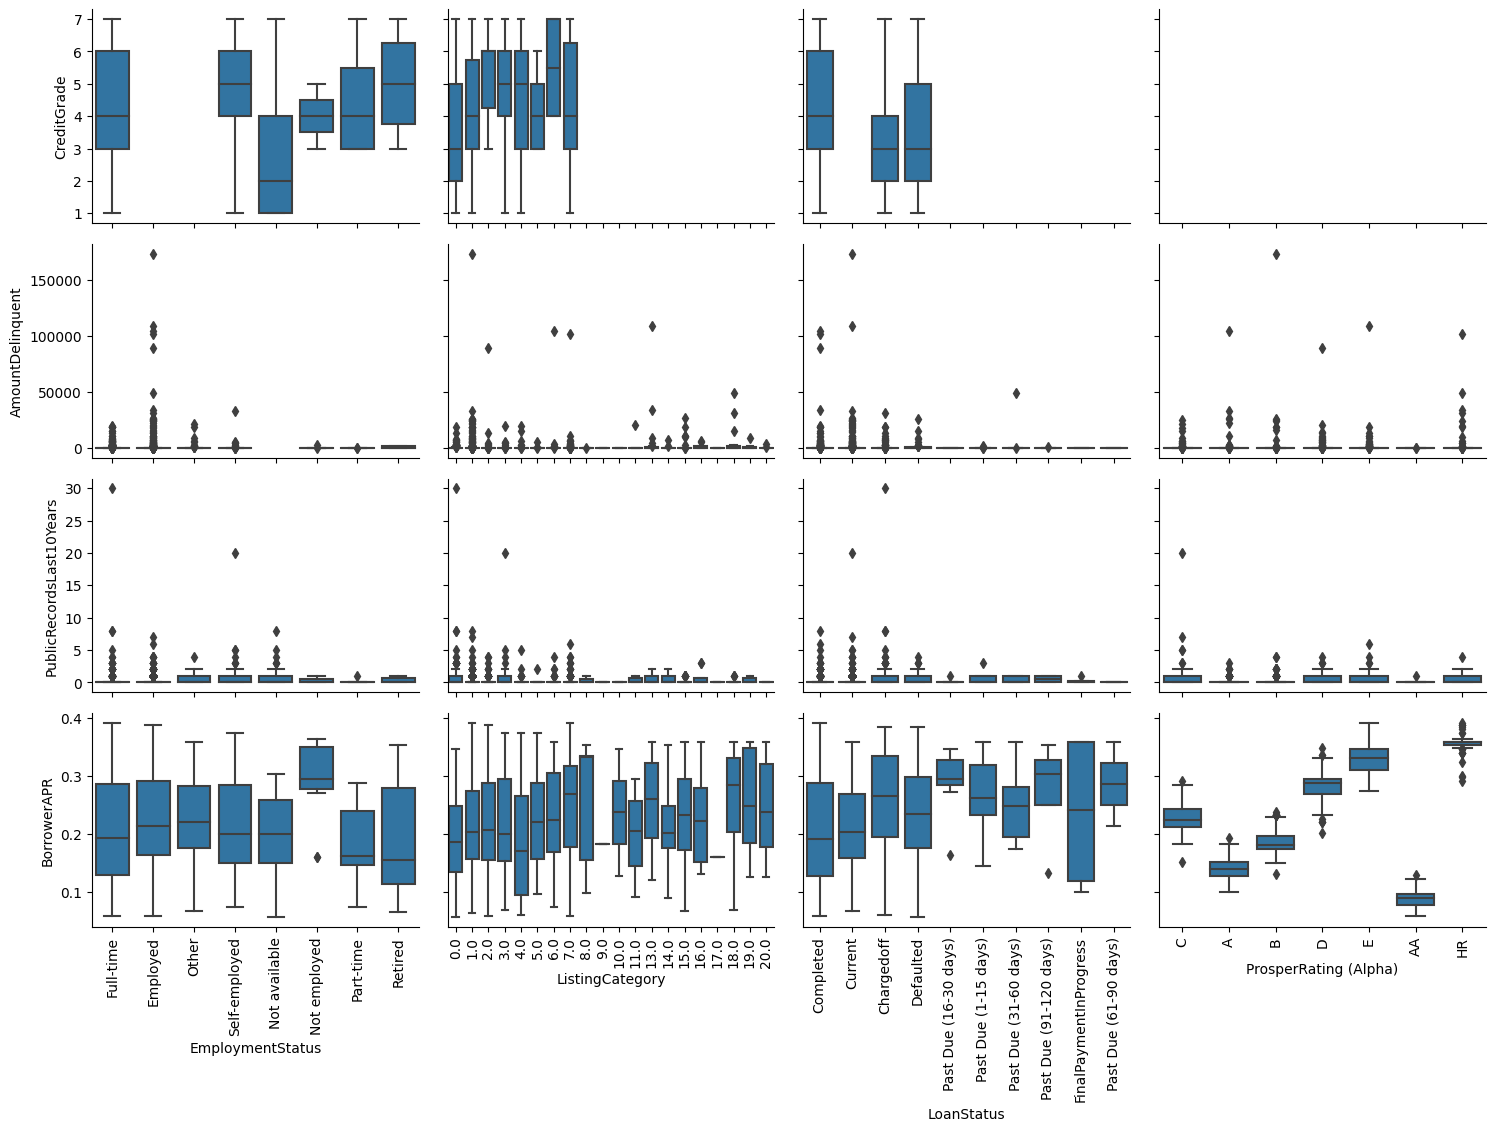

In [43]:
samples = np.random.choice(loans.shape[0], 2000, replace = False)
df_samp = loans.reindex(index = samples)

def boxgrid(x, y, **kwargs):
#Quick hack for creating box plots with seaborn's PairGrid
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = numeric_vars , x_vars = categoric_vars,
             aspect = 1.5)
g.map(boxgrid)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

# using padding
fig.tight_layout(pad=5.0)

plt.show();

#fig.savefig('output12.png', bbox_inches='tight')

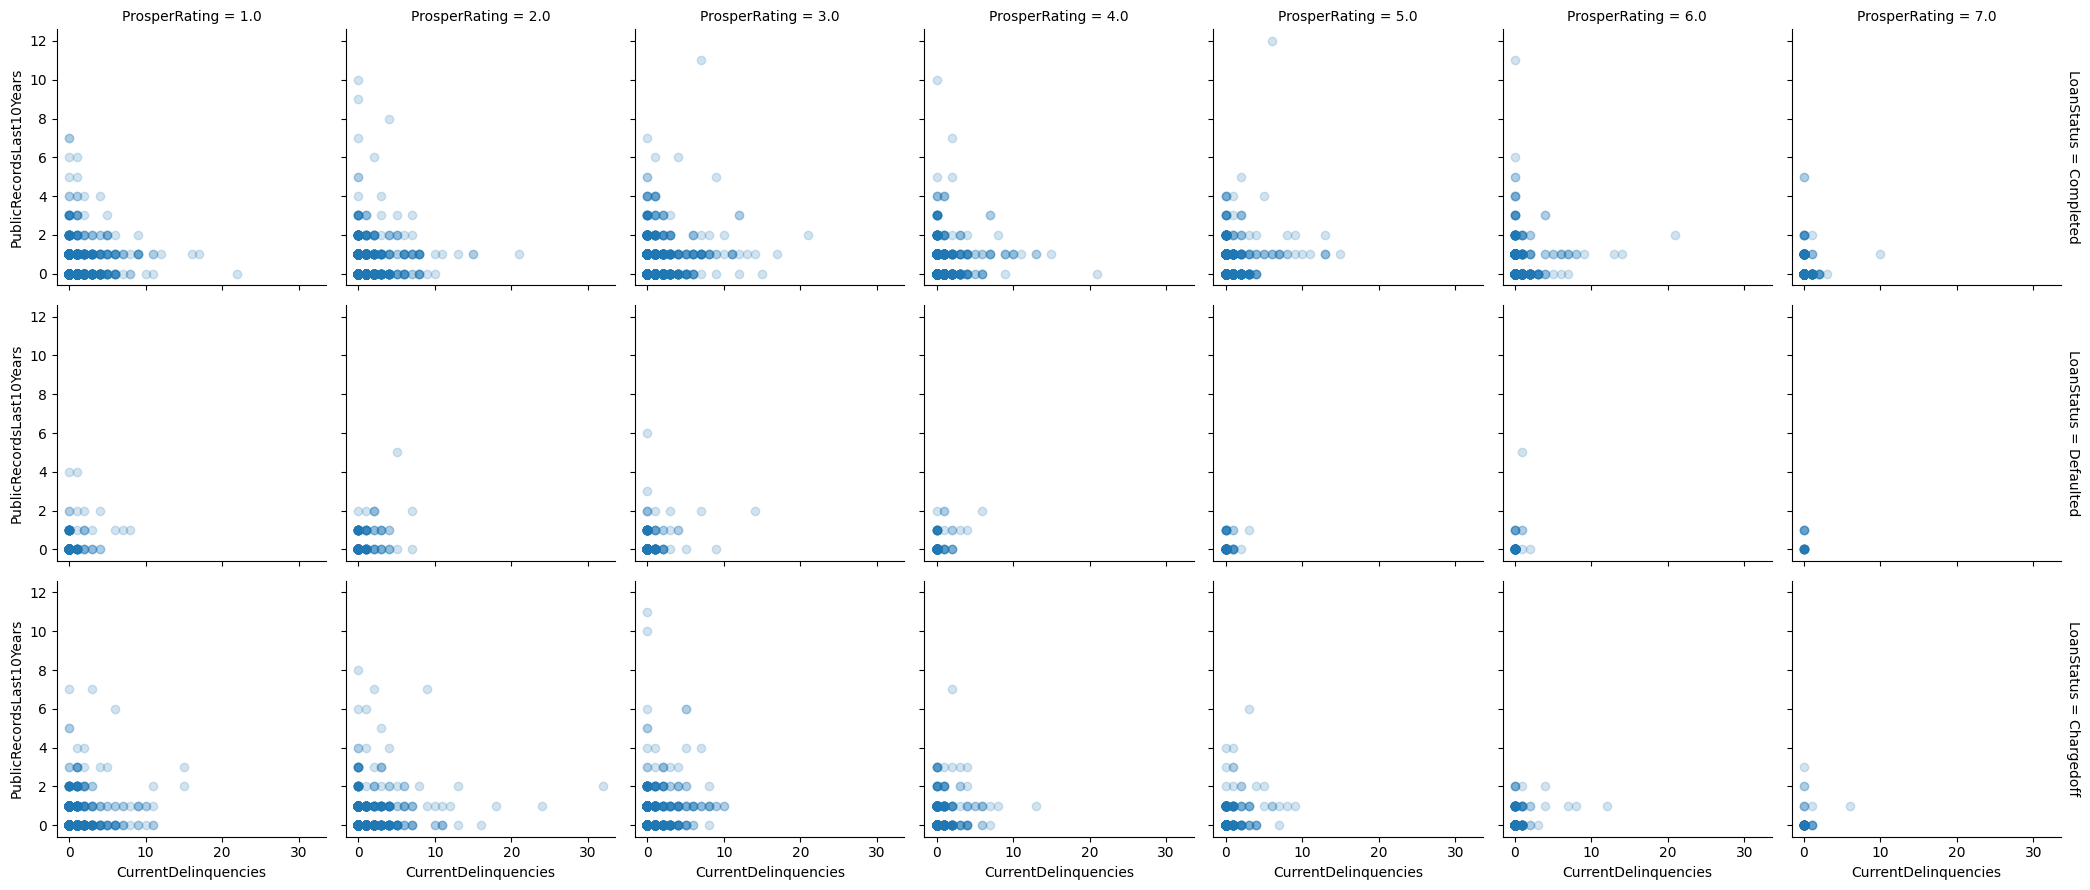

In [44]:
# Filter the DataFrame to include only specific LoanStatus values
filtered_loans = loans[loans['LoanStatus'].isin(['Chargedoff', 'Defaulted', 'Completed'])]

# Create the FacetGrid with the filtered DataFrame
g = sb.FacetGrid(data=filtered_loans, col = 'ProsperRating', row = 'LoanStatus', margin_titles=True)
g.map(plt.scatter,'CurrentDelinquencies', 'PublicRecordsLast10Years', alpha = 1/5)

# Save the figure
# g.savefig('output15.png', bbox_inches='tight')
plt.show()

## Conclusions
The Prosper Loan dataset analysis provided significant insights into factors affecting loan outcomes. The study found that while a majority of loans were completed successfully, a notable percentage were charged off or defaulted. Variables such as CreditGrade and ProsperRating demonstrated expected correlations, with better credit grades leading to lower delinquency and APR rates. Employment status emerged as a critical factor, with certain statuses exhibiting higher default rates. This analysis underscores the importance of understanding borrower profiles and loan characteristics in managing risks and improving loan performance. By leveraging these insights, lenders can make more informed decisions, potentially reducing default rates and enhancing overall loan portfolio health.